# Proyecto GLIO-IA

## Análisis de Datos Transcriptómicos

Cosas a tener en cuenta:

| Archivos | Datos que incluye |
|:----------:|:----------:|
| clinica_combinada.csv    | Recoge Todos los datos  |
| TCGA-GBM.csv   | Glioblastomas   |
| TCGA-LGG.csv   | Otros Gliomas   |


### 1. Carga de Datos y Librerías


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
clinica_combinada = pd.read_csv("clinica_combinada.csv", sep=';')
#clinica_combinada.head()

,project,submitter_id,days_to_recurrence,synchronous_malignancy,morphology,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,...,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode
0,TCGA-GBM,TCGA-06-0122,NaN,Not Reported,9440/3,0.0,NaN,not reported,"Brain, NOS",8.0,...,NaN,not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-06-0122
1,TCGA-GBM,TCGA-02-0016,NaN,Not Reported,9440/3,0.0,NaN,not reported,"Brain, NOS",1699.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0016
2,TCGA-GBM,TCGA-06-2566,NaN,Not Reported,9440/3,0.0,NaN,not reported,"Brain, NOS",182.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-06-2566
3,TCGA-GBM,TCGA-12-5301,NaN,Not Reported,9440/3,0.0,NaN,not reported,"Brain, NOS",62.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-12-5301
4,TCGA-GBM,TCGA-41-2573,NaN,Not Reported,9440/3,0.0,NaN,not reported,"Brain, NOS",272.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-41-2573


In [3]:
# glioblastoma = pd.read_csv("TCGA-GBM.csv", sep=';')
# glioblastoma.head()
# otros_gliomas = pd.read_csv("TCGA-LGG.csv", sep=';')
# otros_gliomas.head()

### 2. Limpieza y Normalización del Dataset "clinica_combinada.csv"

Cogemos aquellas columnas que consideramos importantes. Lo hago a ojo, viendo un poco el nombre de la variable y los datos que contiene

In [4]:
datos_clinica = clinica_combinada.loc[:, ["project", "submitter_id", "morphology", "tissue_or_organ_of_origin", "days_to_last_follow_up", "primary_diagnosis", "year_of_diagnosis", "prior_treatment", "race", "gender", "ethnicity", "vital_status","age_at_index", "days_to_death", "year_of_death", "treatments_pharmaceutical_treatment_or_therapy", "treatments_radiation_treatment_or_therapy"]]
#datos_clinica.head(10)

,project,submitter_id,morphology,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,year_of_diagnosis,prior_treatment,race,gender,ethnicity,vital_status,age_at_index,days_to_death,year_of_death,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_or_therapy
0,TCGA-GBM,TCGA-06-0122,9440/3,"Brain, NOS",8.0,Glioblastoma,2006.0,No,white,female,not hispanic or latino,Dead,84.0,187.0,2006.0,not reported,not reported
1,TCGA-GBM,TCGA-02-0016,9440/3,"Brain, NOS",1699.0,Glioblastoma,2004.0,No,white,male,not hispanic or latino,Dead,50.0,2648.0,NaN,yes,yes
2,TCGA-GBM,TCGA-06-2566,9440/3,"Brain, NOS",182.0,Glioblastoma,2009.0,No,white,female,not hispanic or latino,Dead,23.0,182.0,2009.0,yes,yes
3,TCGA-GBM,TCGA-12-5301,9440/3,"Brain, NOS",62.0,Glioblastoma,2010.0,No,white,male,not hispanic or latino,Dead,59.0,62.0,2010.0,yes,yes
4,TCGA-GBM,TCGA-41-2573,9440/3,"Brain, NOS",272.0,Glioblastoma,2009.0,No,white,male,not hispanic or latino,Alive,59.0,NaN,NaN,yes,yes
5,TCGA-GBM,TCGA-12-0780,9440/3,"Brain, NOS",434.0,Glioblastoma,2006.0,No,white,female,not hispanic or latino,Dead,51.0,452.0,2007.0,yes,yes
6,TCGA-GBM,TCGA-06-0167,9440/3,"Brain, NOS",NaN,Glioblastoma,2001.0,No,black or african american,male,not hispanic or latino,Dead,44.0,347.0,2001.0,yes,yes
7,TCGA-GBM,TCGA-14-0786,9440/3,"Brain, NOS",701.0,Glioblastoma,1998.0,No,white,female,not reported,Dead,50.0,701.0,1999.0,yes,yes
8,TCGA-GBM,TCGA-19-A6J4,9440/3,"Brain, NOS",NaN,Glioblastoma,2013.0,No,black or african american,male,not hispanic or latino,Dead,68.0,121.0,2013.0,not reported,not reported
9,TCGA-GBM,TCGA-06-0413,9440/3,"Brain, NOS",5.0,Glioblastoma,1995.0,No,white,female,not hispanic or latino,Dead,77.0,96.0,1995.0,no,no


Comprobamos la tipología de los datos y si hay registros con NAs:

In [5]:
tipos_datos = datos_clinica.dtypes
tipos_datos

project                                            object
submitter_id                                       object
morphology                                         object
tissue_or_organ_of_origin                          object
days_to_last_follow_up                            float64
primary_diagnosis                                  object
year_of_diagnosis                                 float64
prior_treatment                                    object
race                                               object
gender                                             object
ethnicity                                          object
vital_status                                       object
age_at_index                                      float64
days_to_death                                     float64
year_of_death                                     float64
treatments_pharmaceutical_treatment_or_therapy     object
treatments_radiation_treatment_or_therapy          object
dtype: object

In [6]:
hay_NAs = datos_clinica.isna().any()
hay_NAs

project                                           False
submitter_id                                      False
morphology                                         True
tissue_or_organ_of_origin                          True
days_to_last_follow_up                             True
primary_diagnosis                                  True
year_of_diagnosis                                  True
prior_treatment                                    True
race                                               True
gender                                             True
ethnicity                                          True
vital_status                                       True
age_at_index                                       True
days_to_death                                      True
year_of_death                                      True
treatments_pharmaceutical_treatment_or_therapy     True
treatments_radiation_treatment_or_therapy          True
dtype: bool

#### 2.1 Normalización Datos Cuantitativos

A continuación, trataremos de normalizar los datos, por lo que el primer paso será tratar de las variables numéricas, los registros que contengan Valores Nulos.

Primero, seleccionamos las columnas numéricas y las pasamos a lista:

In [7]:
datos_clinica_numericos = datos_clinica.select_dtypes(include=('float64'))
columnas_numericas = datos_clinica_numericos.columns.tolist()

Ahora eliminamos del Conjunto de Datos, aquellos registros que no contienen datos numéricos:

In [8]:
datos_clinica.dropna(subset=columnas_numericas, how='all', inplace=True)
datos_clinica.head(10)

,project,submitter_id,morphology,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,year_of_diagnosis,prior_treatment,race,gender,ethnicity,vital_status,age_at_index,days_to_death,year_of_death,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_or_therapy
0,TCGA-GBM,TCGA-06-0122,9440/3,"Brain, NOS",8.0,Glioblastoma,2006.0,No,white,female,not hispanic or latino,Dead,84.0,187.0,2006.0,not reported,not reported
1,TCGA-GBM,TCGA-02-0016,9440/3,"Brain, NOS",1699.0,Glioblastoma,2004.0,No,white,male,not hispanic or latino,Dead,50.0,2648.0,NaN,yes,yes
2,TCGA-GBM,TCGA-06-2566,9440/3,"Brain, NOS",182.0,Glioblastoma,2009.0,No,white,female,not hispanic or latino,Dead,23.0,182.0,2009.0,yes,yes
3,TCGA-GBM,TCGA-12-5301,9440/3,"Brain, NOS",62.0,Glioblastoma,2010.0,No,white,male,not hispanic or latino,Dead,59.0,62.0,2010.0,yes,yes
4,TCGA-GBM,TCGA-41-2573,9440/3,"Brain, NOS",272.0,Glioblastoma,2009.0,No,white,male,not hispanic or latino,Alive,59.0,NaN,NaN,yes,yes
5,TCGA-GBM,TCGA-12-0780,9440/3,"Brain, NOS",434.0,Glioblastoma,2006.0,No,white,female,not hispanic or latino,Dead,51.0,452.0,2007.0,yes,yes
6,TCGA-GBM,TCGA-06-0167,9440/3,"Brain, NOS",NaN,Glioblastoma,2001.0,No,black or african american,male,not hispanic or latino,Dead,44.0,347.0,2001.0,yes,yes
7,TCGA-GBM,TCGA-14-0786,9440/3,"Brain, NOS",701.0,Glioblastoma,1998.0,No,white,female,not reported,Dead,50.0,701.0,1999.0,yes,yes
8,TCGA-GBM,TCGA-19-A6J4,9440/3,"Brain, NOS",NaN,Glioblastoma,2013.0,No,black or african american,male,not hispanic or latino,Dead,68.0,121.0,2013.0,not reported,not reported
9,TCGA-GBM,TCGA-06-0413,9440/3,"Brain, NOS",5.0,Glioblastoma,1995.0,No,white,female,not hispanic or latino,Dead,77.0,96.0,1995.0,no,no


Ahora creamos un nuevo dataframe con las variables numéricas:

In [9]:
datos_clinica_numericos = datos_clinica.select_dtypes(include='float64')
datos_clinica_numericos.head(10)

,days_to_last_follow_up,year_of_diagnosis,age_at_index,days_to_death,year_of_death
0,8.0,2006.0,84.0,187.0,2006.0
1,1699.0,2004.0,50.0,2648.0,NaN
2,182.0,2009.0,23.0,182.0,2009.0
3,62.0,2010.0,59.0,62.0,2010.0
4,272.0,2009.0,59.0,NaN,NaN
5,434.0,2006.0,51.0,452.0,2007.0
6,NaN,2001.0,44.0,347.0,2001.0
7,701.0,1998.0,50.0,701.0,1999.0
8,NaN,2013.0,68.0,121.0,2013.0
9,5.0,1995.0,77.0,96.0,1995.0


Comprobamos las variables que aún cuentan con NAs:

In [10]:
hay_NAs = datos_clinica_numericos.isna().any()
hay_NAs

days_to_last_follow_up     True
year_of_diagnosis         False
age_at_index              False
days_to_death              True
year_of_death              True
dtype: bool

Podemos entender, que las variables que aún muestran NAs es porque esas personas no han fallecido, por lo que vamos a poner los NAs como 0:

In [11]:
datos_clinica_numericos = datos_clinica_numericos.fillna(0)
datos_clinica_numericos.head(10)

,days_to_last_follow_up,year_of_diagnosis,age_at_index,days_to_death,year_of_death
0,8.0,2006.0,84.0,187.0,2006.0
1,1699.0,2004.0,50.0,2648.0,0.0
2,182.0,2009.0,23.0,182.0,2009.0
3,62.0,2010.0,59.0,62.0,2010.0
4,272.0,2009.0,59.0,0.0,0.0
5,434.0,2006.0,51.0,452.0,2007.0
6,0.0,2001.0,44.0,347.0,2001.0
7,701.0,1998.0,50.0,701.0,1999.0
8,0.0,2013.0,68.0,121.0,2013.0
9,5.0,1995.0,77.0,96.0,1995.0


Comprobamos que las variables numéricas, lo sean de forma correcta:

In [12]:
for col in datos_clinica_numericos.columns:
    if datos_clinica_numericos[col].dtype == 'float64':  # O cualquier otro tipo numérico que desees convertir
        datos_clinica_numericos[col] = datos_clinica_numericos[col].astype(int)

In [13]:
tipos_datos = datos_clinica_numericos.dtypes
tipos_datos

days_to_last_follow_up    int32
year_of_diagnosis         int32
age_at_index              int32
days_to_death             int32
year_of_death             int32
dtype: object

In [14]:
datos_clinica_numericos.head(10)

,days_to_last_follow_up,year_of_diagnosis,age_at_index,days_to_death,year_of_death
0,8,2006,84,187,2006
1,1699,2004,50,2648,0
2,182,2009,23,182,2009
3,62,2010,59,62,2010
4,272,2009,59,0,0
5,434,2006,51,452,2007
6,0,2001,44,347,2001
7,701,1998,50,701,1999
8,0,2013,68,121,2013
9,5,1995,77,96,1995


Una vez ya tenemos las variables numéricas bien definidas, podemos hacer una Matriz de Correlación:

In [15]:
matriz_correlacion = datos_clinica_numericos.corr()
matriz_correlacion.style.background_gradient(cmap = "ocean").format(precision=2)

,days_to_last_follow_up,year_of_diagnosis,age_at_index,days_to_death,year_of_death
days_to_last_follow_up,1.00,-0.08,-0.31,0.15,-0.30
year_of_diagnosis,-0.08,1.00,-0.14,-0.45,-0.64
age_at_index,-0.31,-0.14,1.00,-0.09,0.36
days_to_death,0.15,-0.45,-0.09,1.00,0.36
year_of_death,-0.30,-0.64,0.36,0.36,1.00


Por último integramos los cambios en el conjunto de datos:

In [16]:
datos_clinica.loc[:, (columnas_numericas)] = datos_clinica_numericos.loc[:, (columnas_numericas)]
datos_clinica.head(10)

,project,submitter_id,morphology,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,year_of_diagnosis,prior_treatment,race,gender,ethnicity,vital_status,age_at_index,days_to_death,year_of_death,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_or_therapy
0,TCGA-GBM,TCGA-06-0122,9440/3,"Brain, NOS",8,Glioblastoma,2006,No,white,female,not hispanic or latino,Dead,84,187,2006,not reported,not reported
1,TCGA-GBM,TCGA-02-0016,9440/3,"Brain, NOS",1699,Glioblastoma,2004,No,white,male,not hispanic or latino,Dead,50,2648,0,yes,yes
2,TCGA-GBM,TCGA-06-2566,9440/3,"Brain, NOS",182,Glioblastoma,2009,No,white,female,not hispanic or latino,Dead,23,182,2009,yes,yes
3,TCGA-GBM,TCGA-12-5301,9440/3,"Brain, NOS",62,Glioblastoma,2010,No,white,male,not hispanic or latino,Dead,59,62,2010,yes,yes
4,TCGA-GBM,TCGA-41-2573,9440/3,"Brain, NOS",272,Glioblastoma,2009,No,white,male,not hispanic or latino,Alive,59,0,0,yes,yes
5,TCGA-GBM,TCGA-12-0780,9440/3,"Brain, NOS",434,Glioblastoma,2006,No,white,female,not hispanic or latino,Dead,51,452,2007,yes,yes
6,TCGA-GBM,TCGA-06-0167,9440/3,"Brain, NOS",0,Glioblastoma,2001,No,black or african american,male,not hispanic or latino,Dead,44,347,2001,yes,yes
7,TCGA-GBM,TCGA-14-0786,9440/3,"Brain, NOS",701,Glioblastoma,1998,No,white,female,not reported,Dead,50,701,1999,yes,yes
8,TCGA-GBM,TCGA-19-A6J4,9440/3,"Brain, NOS",0,Glioblastoma,2013,No,black or african american,male,not hispanic or latino,Dead,68,121,2013,not reported,not reported
9,TCGA-GBM,TCGA-06-0413,9440/3,"Brain, NOS",5,Glioblastoma,1995,No,white,female,not hispanic or latino,Dead,77,96,1995,no,no


#### 2.2 Normalización Datos Cualitativos

El siguiente paso, será tratar las variables Cualitativas, por lo que empezaremos por convertir a Factor la variable <i>project</i>, <i>morphology</i>, <i>tissue_or_organ_of_origin</i>, <i>primary_diagnosis</i>, <i>race</i>, <i>gender</i>, <i>ethnicity</i>, <i>vital_status</i>, <i>treatments_pharmaceutical_treatment_or_therapy</i> y <i>treatments_radiation_treatment_or_therapy</i>,:

In [17]:
datos_clinica['project'] = datos_clinica['project'].astype('category')
datos_clinica['morphology'] = datos_clinica['morphology'].astype('category')
datos_clinica['tissue_or_organ_of_origin'] = datos_clinica['tissue_or_organ_of_origin'].astype('category')
datos_clinica['primary_diagnosis'] = datos_clinica['primary_diagnosis'].astype('category')
datos_clinica['prior_treatment'] = datos_clinica['prior_treatment'].astype('category')
datos_clinica['race'] = datos_clinica['race'].astype('category')
datos_clinica['gender'] = datos_clinica['gender'].astype('category')
datos_clinica['ethnicity'] = datos_clinica['ethnicity'].astype('category')
datos_clinica['vital_status'] = datos_clinica['vital_status'].astype('category')
datos_clinica['treatments_pharmaceutical_treatment_or_therapy'] = datos_clinica['treatments_pharmaceutical_treatment_or_therapy'].astype('category')
datos_clinica['treatments_radiation_treatment_or_therapy'] = datos_clinica['treatments_radiation_treatment_or_therapy'].astype('category')
datos_clinica

,project,submitter_id,morphology,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,year_of_diagnosis,prior_treatment,race,gender,ethnicity,vital_status,age_at_index,days_to_death,year_of_death,treatments_pharmaceutical_treatment_or_therapy,treatments_radiation_treatment_or_therapy
0,TCGA-GBM,TCGA-06-0122,9440/3,"Brain, NOS",8,Glioblastoma,2006,No,white,female,not hispanic or latino,Dead,84,187,2006,not reported,not reported
1,TCGA-GBM,TCGA-02-0016,9440/3,"Brain, NOS",1699,Glioblastoma,2004,No,white,male,not hispanic or latino,Dead,50,2648,0,yes,yes
2,TCGA-GBM,TCGA-06-2566,9440/3,"Brain, NOS",182,Glioblastoma,2009,No,white,female,not hispanic or latino,Dead,23,182,2009,yes,yes
3,TCGA-GBM,TCGA-12-5301,9440/3,"Brain, NOS",62,Glioblastoma,2010,No,white,male,not hispanic or latino,Dead,59,62,2010,yes,yes
4,TCGA-GBM,TCGA-41-2573,9440/3,"Brain, NOS",272,Glioblastoma,2009,No,white,male,not hispanic or latino,Alive,59,0,0,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,TCGA-LGG,TCGA-DU-7306,9382/3,Cerebrum,1277,Mixed glioma,2008,No,white,male,not hispanic or latino,Alive,67,0,0,yes,yes
1128,TCGA-LGG,TCGA-HT-7873,9382/3,Cerebrum,718,Mixed glioma,2011,No,white,male,not hispanic or latino,Alive,29,0,0,no,yes
1129,TCGA-LGG,TCGA-HW-7490,9400/3,Cerebrum,1387,"Astrocytoma, NOS",2011,No,white,male,not hispanic or latino,Alive,41,0,0,no,no
1130,TCGA-LGG,TCGA-FG-7637,9382/3,Cerebrum,1219,Mixed glioma,2009,No,white,male,not hispanic or latino,Alive,49,0,0,no,no


Como las variables <i>prior_treatment</i>, <i>treatments_pharmaceutical_treatment_or_therapy</i> y <i>treatments_radiation_treatment_or_therapy</i> presentan varios valores, donde "No" y "Not Reported" son similares, convertiremos "Not Reported" a "No":

In [18]:
datos_clinica['prior_treatment'] = datos_clinica['prior_treatment'].replace(['Not Reported'], 'No').replace(['Yes'], 'yes').replace(['No'], 'no')

datos_clinica['treatments_pharmaceutical_treatment_or_therapy'] = datos_clinica['treatments_pharmaceutical_treatment_or_therapy'].replace(['not reported'], 'no')
datos_clinica['treatments_radiation_treatment_or_therapy'] = datos_clinica['treatments_radiation_treatment_or_therapy'].replace(['not reported'], 'no')

Para la variable <i>ethnicity</i>, tenemos los siguientes valores: "hispanic or latino", "not hispanic or latino" y "not reported", por lo que los dejaremos como "hispanic or latino" y "others"

In [19]:
datos_clinica['ethnicity'] = datos_clinica['ethnicity'].replace(['not hispanic or latino'], 'others').replace(['not reported'], 'others')

##### 2.2.1 Variable Objetivo

La <b>variable objetivo</b> será la variable <i>vital_status</i>, por lo que pasaremos a convertir los valores a 0 si la persona no ha sobrevivido, y 1 si la persona si ha sobrevivido

In [20]:
datos_clinica['vital_status'].value_counts()

Dead            618
Alive           489
Not Reported      4
Name: vital_status, dtype: int64

Como se puede apreciar, tenemos 4 registros de personas que no sabemos su estado, por lo que vamos a comprobar con la variable <i>days_to_death</i> si el valor es 0 o no, para pasar esos registros a sobrevive o no:

In [21]:
comprobamos = datos_clinica.loc[datos_clinica['vital_status'] == 'Not Reported', 'days_to_death']
comprobamos

239    0
294    0
502    0
734    0
Name: days_to_death, dtype: int32

Como se puede apreciar, en la variable <i>days_to_death</i> el valor es 0, por lo que podemos convertir los valores de 'not reported' a Alive

In [22]:
datos_clinica['vital_status'] = datos_clinica['vital_status'].replace(['Not Reported'], 'Alive')

In [23]:
datos_clinica['vital_status'].value_counts()

Dead     618
Alive    493
Name: vital_status, dtype: int64

Una vez ya tenemos la variable correctamente definida, convertimos las valores a 0 y 1:

In [24]:
mapeo = {'Dead': 0, 'Alive': 1}

In [25]:
datos_clinica['vital_status'] = datos_clinica['vital_status'].map(mapeo)

In [26]:
datos_clinica['vital_status'].value_counts()

0    618
1    493
Name: vital_status, dtype: int64

### 3. Exploración de los Datos

El primer paso, va a ser realizar un nuevo CSV con los datos más relevantes, ya que están limpios y normalizados:

In [27]:
# datos_clinica.to_csv('datos_clinica.csv', index=False)
# datos_clinica.to_excel('datos_clinica.xlsx', index=False)

#### 3.1 Resumen Estadístico

Vamos a realizar un resumen estadístico de las variables numéricas

In [28]:
datos_clinica.describe()

,days_to_last_follow_up,year_of_diagnosis,age_at_index,days_to_death,year_of_death
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,561.675068,2006.817282,50.927993,359.946895,972.517552
std,723.728128,5.231050,15.780483,651.713721,1002.303181
min,-1.000000,1989.000000,10.000000,0.000000,0.000000
25%,104.500000,2004.000000,38.000000,0.000000,0.000000
50%,359.000000,2008.000000,52.000000,96.000000,0.000000
75%,702.500000,2011.000000,63.000000,466.000000,2005.000000
max,6423.000000,2013.000000,89.000000,5166.000000,2013.000000


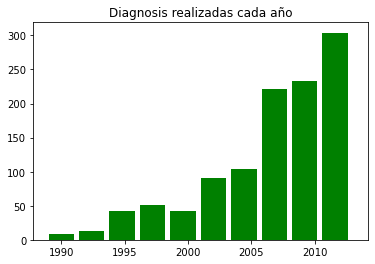

In [29]:
plt.hist(datos_clinica['year_of_diagnosis'], width = 2, color = 'green')
plt.title('Diagnosis realizadas cada año')
plt.show()

Como se puede apreciar, el número de Diagnosis realizadas se ha ido incrementando con el paso del tiempo

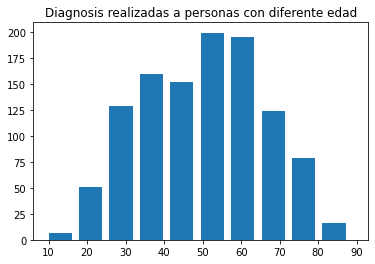

In [30]:
plt.hist(datos_clinica['age_at_index'], width = 6)
plt.title('Diagnosis realizadas a personas con diferente edad')
plt.show()

<b>Entre los 25 y los 70 años de edad, es cuántas más diagnosis se realizan</b>

#### 3.2 Distribución de las Variables Categóricas

En primer lugar, conviene conocer el <b>género</b> y la <b>edad</b> de los pacientes

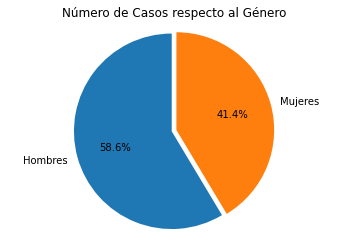

In [31]:
comparativa_genero = datos_clinica['gender'].value_counts(normalize=True)
labels = ['Hombres', 'Mujeres']
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa_genero.values, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.title('Número de Casos respecto al Género')
plt.show()

Del total de personas diagnosticadas con gliomas, tenemos un 58.6% en el género masculino, y un 41.4% del género femenino.

Y realizamos una visualización conjunta de género y edad:

In [32]:
df_hombre_edad = datos_clinica[datos_clinica['gender']=='male']['age_at_index']
df_mujeres_edad = datos_clinica[datos_clinica['gender']=='female']['age_at_index']

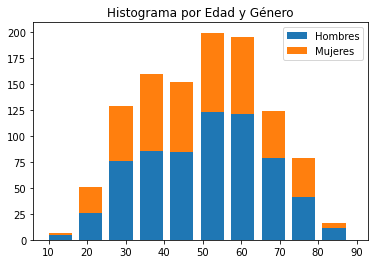

In [33]:
plt.hist([df_hombre_edad, df_mujeres_edad], 
         label = ['Hombres', 'Mujeres'],
         width = 6,
         stacked = True)

plt.title('Histograma por Edad y Género')
plt.legend(prop = {'size': 10})
plt.show()

Mediante esta visualización, podemos ver como en la gran mayoría de rangos de edades, <b>tenemos más hombres que mujeres</b>

También vamos a estudiar cuántos casos tenemos de diferentes razas

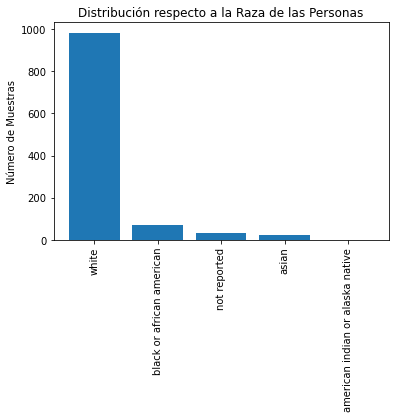

In [34]:
frecuencia = datos_clinica['race'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)

plt.ylabel('Número de Muestras')
plt.title('Distribución respecto a la Raza de las Personas')
plt.xticks(rotation = 90)
plt.show()

Como se puede apreciar, casi todos los casos corresponden a personas de <b>raza 'blanca'</b>

Y en cuanto a la <b>etnia</b>:

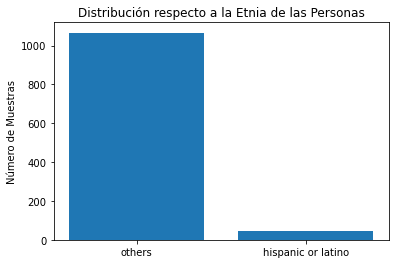

In [35]:
frecuencia = datos_clinica['ethnicity'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)

plt.ylabel('Número de Muestras')
plt.title('Distribución respecto a la Etnia de las Personas')

plt.show()

Por lo que la etnia tampoco nos proporciona mucho valor

Otro aspecto importante, es conocer cuántos casos tenemos de <b>glioblastomas</b> y cuántos de <b>otros gliomas</b>:

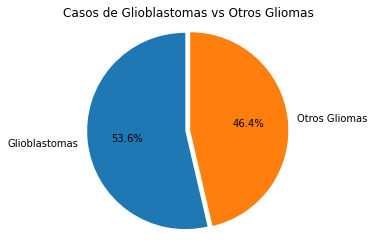

In [36]:
comparativa = datos_clinica['project'].value_counts(normalize=True)
labels = ['Glioblastomas', 'Otros Gliomas']
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa.values, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.title('Casos de Glioblastomas vs Otros Gliomas')
plt.show()

Tal y como se puede apreciar, en el conjunto de datos tenemos un <b>53.6%</b> de casos relacionados con los <b>Glioblastomas</b>, y un <b>46.4%</b> de <b>otros gliomas</b>.

También podemos visualizar los distintos <b>tipos de gliomas</b> a los que nos enfrentamos

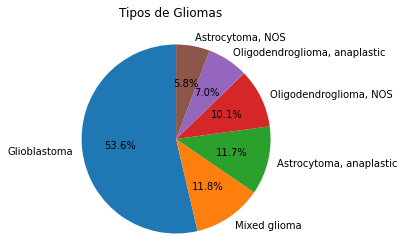

In [37]:
comparativa = datos_clinica['primary_diagnosis'].value_counts(normalize=True)

plt.pie(comparativa.values,  
        labels = comparativa.index, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.suptitle('Tipos de Gliomas', y = 0.95)
plt.subplots_adjust(top = 0.85)
plt.show()

Visualizamos las diferentes <b>morfologías</b> que encontramos:

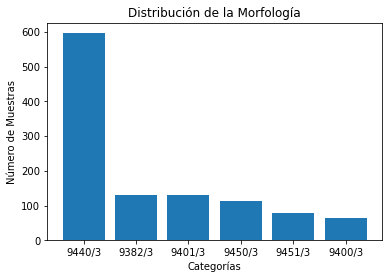

In [38]:
frecuencia = datos_clinica['morphology'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)

plt.xlabel('Categorías')
plt.ylabel('Número de Muestras')
plt.title('Distribución de la Morfología')
plt.show()

#### 3.3 Análisis de la Supervivencia

El siguiente paso será comprobar cuántas personas no han conseguido sobrevivir, y cuántas si lo han conseguido: 

In [39]:
no_sobrevive = (datos_clinica['vital_status'] == 0).sum()

si_sobrevive = (datos_clinica['vital_status'] == 1).sum()

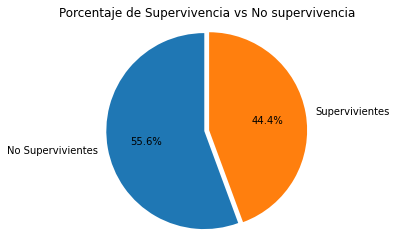

In [40]:
comparativa_supervivencia = [no_sobrevive, si_sobrevive]
labels = ['No Supervivientes', 'Supervivientes']
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa_supervivencia, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.title('Porcentaje de Supervivencia vs No supervivencia')
plt.show()

Contamos con un 44.4% de supervivientes

Ahora estudiaremos la relación entre el <b>género</b> y las <b>probabilidades de sobrevivir</b>:

Primero haremos las agrupaciones

In [41]:
hombres = datos_clinica[datos_clinica['gender'] == 'male']
mujeres = datos_clinica[datos_clinica['gender'] == 'female']

In [42]:
# Calculamos el porcentaje de hombres que sobreviven y los que no
porcentaje_hombres_sobreviven = (hombres['vital_status'] == 1).mean() * 100
porcentaje_hombres_no_sobreviven = (hombres['vital_status'] == 0).mean() * 100

# Calcular el porcentaje de mujeres que sobreviven y las que no
porcentaje_mujeres_sobreviven = (mujeres['vital_status'] == 1).mean() * 100
porcentaje_mujeres_no_sobreviven = (mujeres['vital_status'] == 0).mean() * 100

In [43]:
print("Porcentaje de hombres que sobreviven: {:.2f}%".format(porcentaje_hombres_sobreviven))
print("Porcentaje de hombres que NO sobreviven: {:.2f}%".format(porcentaje_hombres_no_sobreviven))
print("Porcentaje de mujeres que sobreviven: {:.2f}%".format(porcentaje_mujeres_sobreviven))
print("Porcentaje de mujeres que NO sobreviven: {:.2f}%".format(porcentaje_mujeres_no_sobreviven))

Porcentaje de hombres que sobreviven: 41.78%
Porcentaje de hombres que NO sobreviven: 58.22%
Porcentaje de mujeres que sobreviven: 48.04%
Porcentaje de mujeres que NO sobreviven: 51.96%


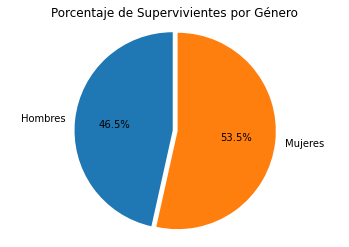

In [44]:
# Etiquetas para el eje x
etiquetas = ['Hombres', 'Mujeres']


valores = [porcentaje_hombres_sobreviven, porcentaje_mujeres_sobreviven]
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(valores, 
        labels = etiquetas,
        explode = explode,
        autopct='%1.1f%%',
        startangle = 90)

plt.axis('equal')
plt.title('Porcentaje de Supervivientes por Género')
plt.show()

Por tanto, podemos apreciar como <b>el género es un factor importante a tener en cuenta</b>, ya que hay más casos de gliomas en hombres que en mujeres, y, sin embargo, las mujeres tienen más posibilidades de sobrevivir,

Ahora comprobaremos como afecta la <b>edad</b> a las provabilidades de sobrevivir:

In [45]:
df_edad_no_sobrevive = datos_clinica[datos_clinica['vital_status']== 0]['age_at_index']
df_edad_sobrevive = datos_clinica[datos_clinica['vital_status']== 1]['age_at_index']

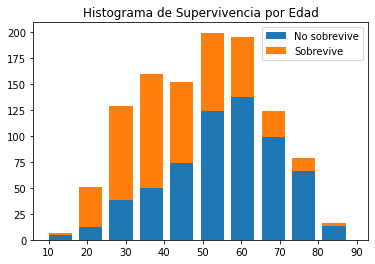

In [46]:
plt.hist([df_edad_no_sobrevive, df_edad_sobrevive], 
         label = ['No sobrevive', 'Sobrevive'],
         width = 6,
         stacked = True)

plt.title('Histograma de Supervivencia por Edad')
plt.legend(prop = {'size': 10})
plt.show()

Tal y como se puede visualizar, hasta <b>antes de los 50 años de edad, hay más probabilidades de sobrevivir</b> que a partir de esta edad. Por lo que <b>la edad también es un factor importante a tener en cuenta</b>.

Por último, comprobaremos si los Tratamientos realizados, tienen alguna importancia en las probabilidades de sobrevivir:

Primero, comprobaremos cúantas personas tuvieron un "tratamiento previo":

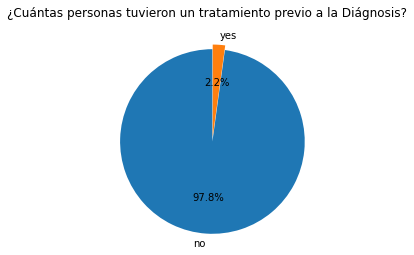

In [47]:
comparativa_tratamientos_previos = datos_clinica['prior_treatment'].value_counts(normalize=True)
labels = comparativa_tratamientos_previos.index
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa_tratamientos_previos.values, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.suptitle('¿Cuántas personas tuvieron un tratamiento previo a la Diágnosis?', y = 0.95)
plt.subplots_adjust(top = 0.85)
plt.show()

Tan solo un 2.2% de todas las personas tuvieron un tratamiento previo, por lo que esta variable no nos va a proporcionar información relevante.

A continuación, analizaremos el impacto que está teniendo los actuales tratamientos que se están implementando, como son los tratamientos farmacéuticos y los tratamientos por radiación:

Visualizamos la distribución de la variable correspondiente a los tratamientos farmaceuticos:

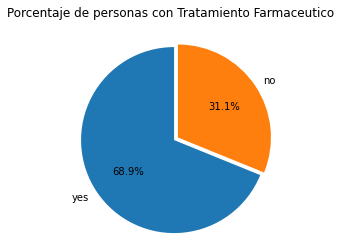

In [48]:
comparativa_tratamientos_farmaceuticos = datos_clinica['treatments_pharmaceutical_treatment_or_therapy'].value_counts(normalize=True)
labels = comparativa_tratamientos_farmaceuticos.index
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa_tratamientos_farmaceuticos.values, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.suptitle('Porcentaje de personas con Tratamiento Farmaceutico', y = 0.95)
plt.subplots_adjust(top = 0.85)
plt.show()

Visualizamos la distribución de la variable correspondiente a los tratamientos por radioterapia:

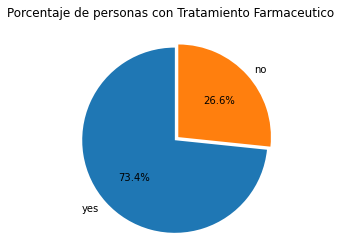

In [49]:
comparativa_tratamientos_radioterapia = datos_clinica['treatments_radiation_treatment_or_therapy'].value_counts(normalize=True)
labels = comparativa_tratamientos_radioterapia.index
explode = [0.05, 0]  # Resaltar la porción de "Distintos de 0"

plt.pie(comparativa_tratamientos_radioterapia.values, 
        explode = explode, 
        labels = labels, 
        autopct = '%1.1f%%', 
        startangle = 90)
plt.axis('equal')

plt.suptitle('Porcentaje de personas con Tratamiento Farmaceutico', y = 0.95)
plt.subplots_adjust(top = 0.85)
plt.show()

En ambos casos, la gran mayoría de pacientes, si reciben un tratamiento.

Por lo que vamos a observar, si las personas con tratamiento, tienen más probabilidades de sobrevivir:

Comprobar las probabilidadas de sobrevivir en base a los distintos Gliomas

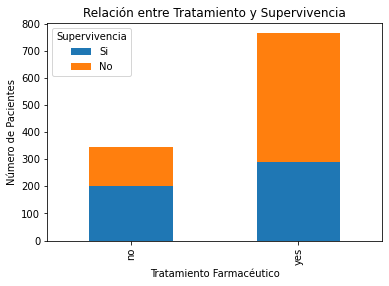

In [50]:
supervivencia_comparativa_tratamiento_farmaceutico = datos_clinica.groupby(['treatments_pharmaceutical_treatment_or_therapy', 'vital_status']).size().unstack()

supervivencia_comparativa_tratamiento_farmaceutico.plot(kind='bar', stacked=True)

plt.xlabel('Tratamiento Farmacéutico')
plt.ylabel('Número de Pacientes')
plt.title('Relación entre Tratamiento y Supervivencia')

plt.legend(title='Supervivencia', labels=['Si','No'])
plt.show()

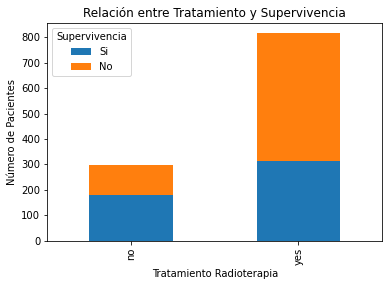

In [51]:
supervivencia_comparativa_tratamiento_radioterapia = datos_clinica.groupby(['treatments_radiation_treatment_or_therapy', 'vital_status']).size().unstack()

supervivencia_comparativa_tratamiento_radioterapia.plot(kind='bar', stacked=True)

plt.xlabel('Tratamiento Radioterapia')
plt.ylabel('Número de Pacientes')
plt.title('Relación entre Tratamiento y Supervivencia')

plt.legend(title='Supervivencia', labels=['Si','No'])
plt.show()

Como se aprecia en las gráficas, ambos tratamientos obtienen, a groso modo, el mismo índice de supervivencia.

Por último, estudiaremos la relación de los diferentes Gliomas con las probabilidades de sobrevivir:

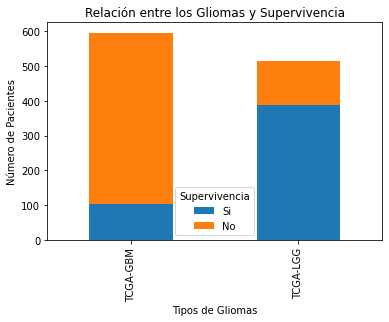

In [52]:
supervivencia_gliomas = datos_clinica.groupby(['project', 'vital_status']).size().unstack()

supervivencia_gliomas.plot(kind='bar', stacked=True)

plt.xlabel('Tipos de Gliomas')
plt.ylabel('Número de Pacientes')
plt.title('Relación entre los Gliomas y Supervivencia')

plt.legend(title='Supervivencia', labels=['Si','No'])
plt.show()

Podemos ver con más detalle los <b>otros tipos de gliomas</b>

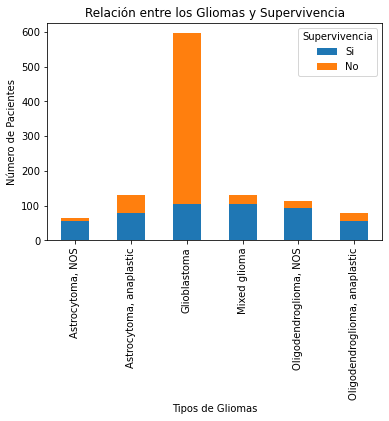

In [53]:
supervivencia_gliomas = datos_clinica.groupby(['primary_diagnosis', 'vital_status']).size().unstack()

supervivencia_gliomas.plot(kind='bar', stacked=True)

plt.xlabel('Tipos de Gliomas')
plt.ylabel('Número de Pacientes')
plt.title('Relación entre los Gliomas y Supervivencia')

plt.legend(title='Supervivencia', labels=['Si','No'])
plt.show()

En cuanto a los <b>Gliomas</b>, parece que los <b>Glioblastomas</b> son más determinantes que <b>otro tipo de gliomas</b>, ya que éstos últimos cuentan con un mayor índice de supervivencia.

### 4. Conclusiones

RESUMEN ESTADÍSTICO
<ul>
    <li>El conjunto de datos posee <b>1.111 registros</b>, de los cuales, el <b>55.6%</b> corresponden a personas que no han sobrevivido (618 casos) y el <b>44.4%</b> a personas que si han sobrevivido (493 casos).</li>
    <li>De los 1.111 registros, el <b>58.6%</b> corresponde al género masculino, y el <b>41.4%</b> al género femenino.</li>
    <li>La gran mayoría de registros, corresponden a personas de entre <b>25 y 70 años de edad</b>.</li>
    <li>Además, la mayoría de personas diagnosticadas, corresponden a personas de <b>raza blanca</b>.</li>
    <li>En cuanto a los <b>Gliomas</b>, tenemos un <b>53.6% de Glioblastomas</b> y un <b>46.4%</b> que corresponde a <b>otros gliomas</b>.</li>
</ul>

RELACIÓN DE SUPERVIVENCIA
<ul>
    <li><b>El género es un factor importante a tener en cuenta</b>, ya que hay más casos de gliomas en hombres que en mujeres, y, sin embargo, las mujeres tienen más posibilidades de sobrevivir.</li>
    <li><b>Antes de los 50 años de edad, hay más probabilidades de sobrevivir</b> que a partir de esta edad. Por lo que la <b>edad</b> también es un factor importante a tener en cuenta.</li>
    <li>Las personas con un tratamiento previo no es un componente a tener en cuenta, ya que tenemos pocos casos, y no son representativos, ya que hay personas con tratamientos previos que también han fallecido.</li>
    <li>Aquellas personas que reciben un <b>tratamiento</b>, tanto farmacéutico como de radioterapia, tienen las mismas probabilidades de sobrevivir. Lamentablemente, el índice de supervivencia es más bajo que el no lograrlo.</li>
    <li>Y, por último, en cuanto a los <b>Gliomas</b>, cabe destacar que los <b>Glioblastomas</b> son más determinantes para la <b>No Supervivencia</b>, ya que hay pocos casos satisfactorios. Por tanto, <b>otro tipo de gliomas</b> tienen un mayor índice de supervivencia.</li>
</ul>